In [1]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from datetime import date, datetime, timedelta

In [2]:
path_earning_call_executives_answer=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_executives_answer_sentiment.csv'

In [3]:
path_teslatrace=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/teslatrace.csv'

In [6]:
path_teslamergentfisd=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/mergentfisd_fromwrds.csv'

In [7]:
data_call_executives_answer_all=pd.read_csv(path_earning_call_executives_answer)
data_call_executives_answer_all['call_datetime']=\
pd.to_datetime(data_call_executives_answer_all['call_datetime'], format='%Y-%m-%d')
data_call_executives_answer_all=data_call_executives_answer_all.sort_values('call_datetime')

In [8]:
teslatrace=pd.read_csv(path_teslatrace, low_memory=False)

In [9]:
teslamergentfisd=pd.read_csv(path_teslamergentfisd, low_memory=False)

In [12]:
data_call_executives_answer_all['call_datetime'].min(),\
data_call_executives_answer_all['call_datetime'].max()

(Timestamp('2010-11-09 00:00:00'), Timestamp('2023-10-18 00:00:00'))

In [19]:
for b in teslatrace['cusip_id'].unique():
    
    print(teslamergentfisd[teslamergentfisd['complete_cusip']==b]['BOND_TYPE'])

108707    CCOV
Name: BOND_TYPE, dtype: object
110021    CCOV
Name: BOND_TYPE, dtype: object
111286    CCOV
Name: BOND_TYPE, dtype: object
111288    CCOV
Name: BOND_TYPE, dtype: object
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
Series([], Name: BOND_TYPE, dtype: object)
117553    CCOV
Name: BOND_TYPE, dtype: object
Series([], Name: BOND_TYPE, dtype: obje

In [20]:
teslatrace['time']=\
teslatrace['trd_exctn_dt']+":"+teslatrace['trd_exctn_tm']
teslatrace['time']=\
pd.to_datetime(teslatrace['time'], format='%Y-%m-%d:%H:%M:%S')

In [21]:
teslatrace=\
teslatrace[['time', 'cusip_id', 'bond_sym_id', 'company_symbol', 'bsym', 'trd_exctn_dt',
            'trd_exctn_tm', 'rptd_pr', 'yld_pt']]

In [22]:
teslatrace.groupby(['cusip_id'])['trd_exctn_dt'].nunique()

cusip_id
83416TAA8     219
83416TAC4     620
83416TAE0      12
83417KAC2       2
83417KAD0       7
83417KAE8       9
83417KAK4      10
83417KAV0       4
83417KAZ1       3
83417KBA5       1
83417KBJ6       2
83417KBN7       6
83417KBQ0       2
83417KBU1       2
83417KCP1       1
83417KCX4      15
83417KDV7       3
83417KEA2       2
83417KEF1       3
83417KEL8       3
83417KFA1       2
83417KFB9       3
83417KFG8       1
83417KFS2       3
88160RAA9     686
88160RAB7    1177
88160RAC5    1707
88160RAD3    1039
88160RAG6     761
U8810LAA1    1018
Name: trd_exctn_dt, dtype: int64

In [23]:
teslatrace[teslatrace['cusip_id']=='83416TAE0']

,time,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,rptd_pr,yld_pt
42956,2018-12-03 17:45:52,83416TAE0,TSLA4441651,TSLA,NaN,2018-12-03,17:45:52,125.0000,NaN
42957,2018-12-03 17:46:12,83416TAE0,TSLA4441651,TSLA,NaN,2018-12-03,17:46:12,125.0000,NaN
42958,2018-12-04 12:30:48,83416TAE0,TSLA4441651,TSLA,NaN,2018-12-04,12:30:48,126.1680,NaN
42959,2018-12-04 12:31:08,83416TAE0,TSLA4441651,TSLA,NaN,2018-12-04,12:31:08,125.8190,NaN
42960,2019-10-25 16:01:14,83416TAE0,TSLA4441651,TSLA,NaN,2019-10-25,16:01:14,116.7500,NaN
42961,2019-10-25 16:01:25,83416TAE0,TSLA4441651,TSLA,NaN,2019-10-25,16:01:25,116.7500,NaN
42962,2019-10-25 16:01:55,83416TAE0,TSLA4441651,TSLA,NaN,2019-10-25,16:01:55,116.7500,NaN
42963,2019-10-25 16:07:10,83416TAE0,TSLA4441651,TSLA,NaN,2019-10-25,16:07:10,116.0000,NaN
42964,2019-12-13 15:31:06,83416TAE0,TSLA4441651,TSLA,BBG00D6TM916,2019-12-13,15:31:06,126.3631,NaN
42965,2019-12-16 16:00:12,83416TAE0,TSLA4441651,TSLA,BBG00D6TM916,2019-12-16,16:00:12,130.0000,NaN


In [24]:
teslatrace['cusip_id'].unique()

array(['88160RAA9', '83416TAA8', '88160RAB7', '88160RAC5', '83417KAC2',
       '83417KAD0', '83417KAE8', '83417KAK4', '83417KAV0', '83417KAZ1',
       '83417KBA5', '83417KBJ6', '83417KBN7', '83417KBQ0', '83417KBU1',
       '83417KCP1', '83417KCX4', '83417KDV7', '83417KEA2', '83417KEF1',
       '83417KEL8', '83416TAC4', '83417KFA1', '83417KFB9', '83417KFG8',
       '83417KFS2', '83416TAE0', '88160RAD3', 'U8810LAA1', '88160RAG6'],
      dtype=object)

In [25]:
teslatrace[teslatrace['cusip_id']=='88160RAA9'].sort_values('time')

,time,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,rptd_pr,yld_pt
0,2013-05-17 07:09:18,88160RAA9,TSLA4007901,TSLA,NaN,2013-05-17,7:09:18,103.0000,NaN
1,2013-05-17 07:51:13,88160RAA9,TSLA4007901,TSLA,NaN,2013-05-17,7:51:13,105.0000,NaN
2,2013-05-17 07:51:16,88160RAA9,TSLA4007901,TSLA,NaN,2013-05-17,7:51:16,104.4375,NaN
3,2013-05-17 07:51:20,88160RAA9,TSLA4007901,TSLA,NaN,2013-05-17,7:51:20,104.0000,NaN
4,2013-05-17 07:51:23,88160RAA9,TSLA4007901,TSLA,NaN,2013-05-17,7:51:23,103.8750,NaN
...,...,...,...,...,...,...,...,...,...
5583,2017-06-01 12:38:00,88160RAA9,TSLA4007901,TSLA,BBG004KPJ4J4,2017-06-01,12:38:00,272.4340,78.953409
5584,2017-06-01 12:38:00,88160RAA9,TSLA4007901,TSLA,BBG004KPJ4J4,2017-06-01,12:38:00,272.4340,78.953409
5581,2017-06-01 12:38:00,88160RAA9,TSLA4007901,TSLA,BBG004KPJ4J4,2017-06-01,12:38:00,272.4340,78.953409
5582,2017-06-01 12:38:00,88160RAA9,TSLA4007901,TSLA,BBG004KPJ4J4,2017-06-01,12:38:00,272.4340,78.953409


In [26]:
teslatrace[teslatrace['cusip_id']=='88160RAA9']['time'].min(),\
teslatrace[teslatrace['cusip_id']=='88160RAA9']['time'].max()

(Timestamp('2013-05-17 07:09:18'), Timestamp('2017-11-14 14:54:32'))

In [28]:
data_call_executives_answer_all.columns

Index(['time', 'call_datetime', 'call_year', 'call_month', 'call_day',
       'company_name', 'company', 'quarter', 'year_quarter',
       'executives_answer', 'executive_text', 'executive_text_removestopwords',
       'executive_neg', 'executive_pos', 'executive_neu'],
      dtype='object')

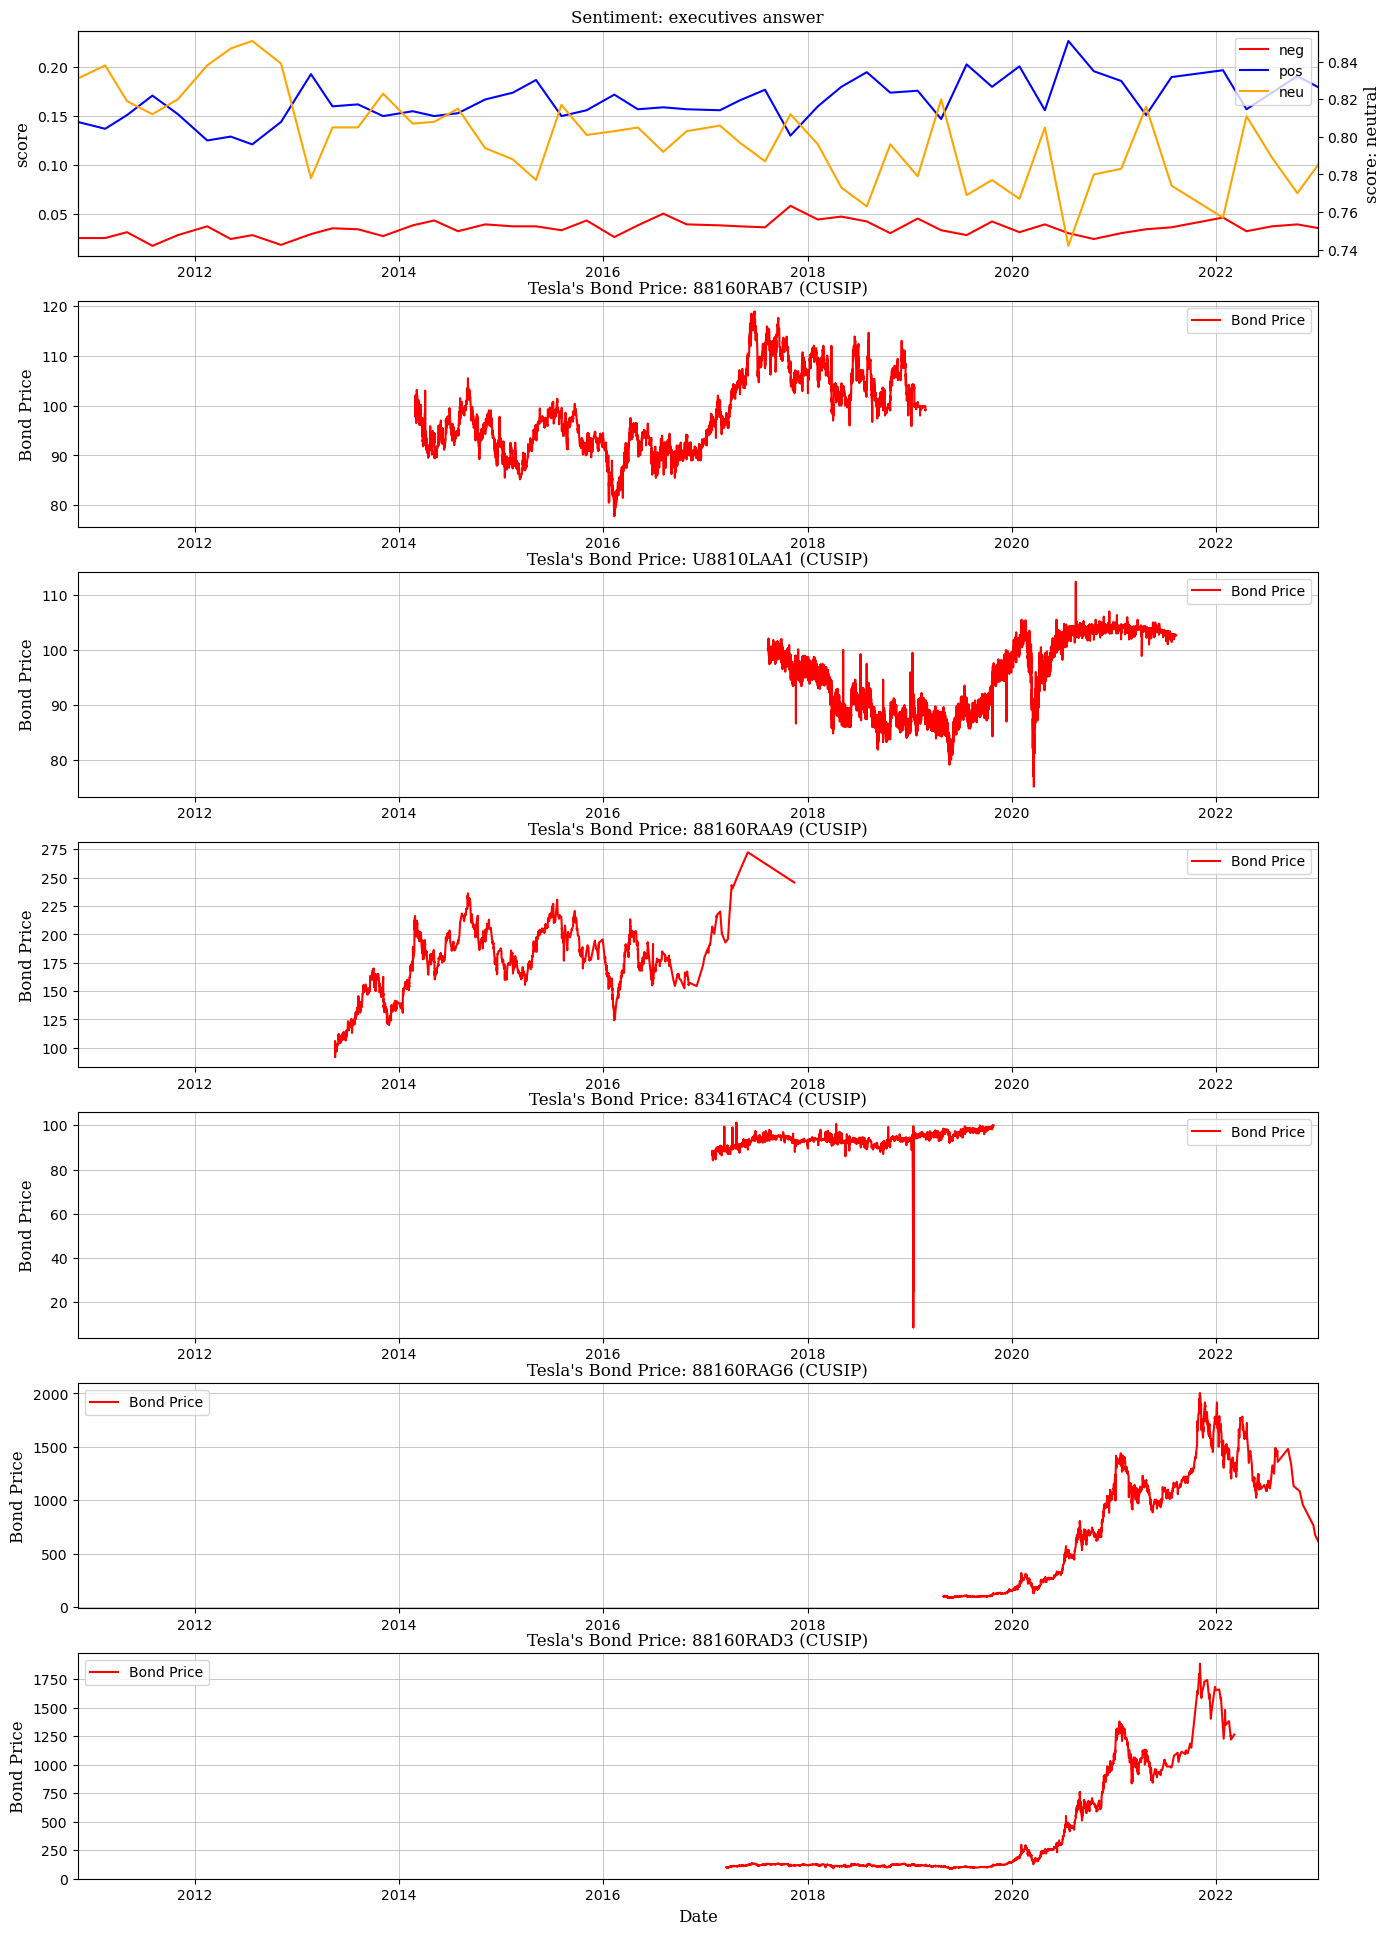

In [31]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([ax1, ax2, ax3, ax4, ax5, ax6, ax7]) = plt.subplots(nrows = 7, ncols = 1, figsize = (16, 24))

lns1=\
ax1.plot(data_call_executives_answer_all['call_datetime'],\
         data_call_executives_answer_all['executive_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_executives_answer_all['call_datetime'],\
         data_call_executives_answer_all['executive_pos'], label='pos', color='b')

ax1.set_title("Sentiment: executives answer", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
# ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.grid(linewidth=0.5)
ax1.legend()


ax11 = ax1.twinx()
lns3=ax11.plot(data_call_executives_answer_all['call_datetime'],\
               data_call_executives_answer_all['executive_neu'], label='neu', color='orange')
ax11.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)
ax1.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 

ax2.plot(teslatrace[teslatrace['cusip_id']=='88160RAB7']['time'],
         teslatrace[teslatrace['cusip_id']=='88160RAB7']['rptd_pr'], label='Bond Price', color='r')

ax2.set_title("Tesla's Bond Price: 88160RAB7 (CUSIP)", **csfont, size = sizetext)
ax2.set_ylabel('Bond Price', size = sizetext, **csfont)
# ax2.set_xlabel('Date', size = sizetext, **csfont)
ax2.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax2.grid(linewidth=0.5)
ax2.legend()

ax3.plot(teslatrace[teslatrace['cusip_id']=='U8810LAA1']['time'],
         teslatrace[teslatrace['cusip_id']=='U8810LAA1']['rptd_pr'], label='Bond Price', color='r')

ax3.set_title("Tesla's Bond Price: U8810LAA1 (CUSIP)", **csfont, size = sizetext)
ax3.set_ylabel('Bond Price', size = sizetext, **csfont)
# ax3.set_xlabel('Date', size = sizetext, **csfont)
ax3.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax3.grid(linewidth=0.5)
ax3.legend()

ax4.plot(teslatrace[teslatrace['cusip_id']=='88160RAA9']['time'],
         teslatrace[teslatrace['cusip_id']=='88160RAA9']['rptd_pr'], label='Bond Price', color='r')

ax4.set_title("Tesla's Bond Price: 88160RAA9 (CUSIP)", **csfont, size = sizetext)
ax4.set_ylabel('Bond Price', size = sizetext, **csfont)
# ax4.set_xlabel('Date', size = sizetext, **csfont)
ax4.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax4.grid(linewidth=0.5)
ax4.legend()


ax5.plot(teslatrace[teslatrace['cusip_id']=='83416TAC4']['time'],
         teslatrace[teslatrace['cusip_id']=='83416TAC4']['rptd_pr'], label='Bond Price', color='r')

ax5.set_title("Tesla's Bond Price: 83416TAC4 (CUSIP)", **csfont, size = sizetext)
ax5.set_ylabel('Bond Price', size = sizetext, **csfont)
# ax5.set_xlabel('Date', size = sizetext, **csfont)
ax5.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax5.grid(linewidth=0.5)
ax5.legend()


ax6.plot(teslatrace[teslatrace['cusip_id']=='88160RAG6']['time'],
         teslatrace[teslatrace['cusip_id']=='88160RAG6']['rptd_pr'], label='Bond Price', color='r')

ax6.set_title("Tesla's Bond Price: 88160RAG6 (CUSIP)", **csfont, size = sizetext)
ax6.set_ylabel('Bond Price', size = sizetext, **csfont)
# ax6.set_xlabel('Date', size = sizetext, **csfont)
ax6.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax6.grid(linewidth=0.5)
ax6.legend()


ax7.plot(teslatrace[teslatrace['cusip_id']=='88160RAD3']['time'],
         teslatrace[teslatrace['cusip_id']=='88160RAD3']['rptd_pr'], label='Bond Price', color='r')

ax7.set_title("Tesla's Bond Price: 88160RAD3 (CUSIP)", **csfont, size = sizetext)
ax7.set_ylabel('Bond Price', size = sizetext, **csfont)
ax7.set_xlabel('Date', size = sizetext, **csfont)
ax7.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax7.grid(linewidth=0.5)
ax7.legend()